In [32]:
import numpy as np
import TC_Functions as TC
import matplotlib.pyplot as plt

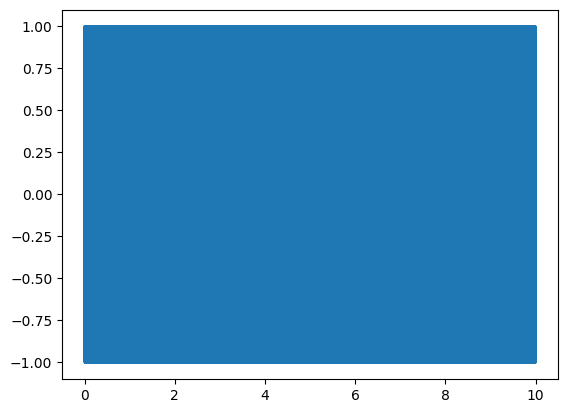

In [57]:
data = np.random.randint(0, 2, 10)

modulated_data = TC.chirp_modulate(data, 44e3, 1e3, 200, 1)
plt.plot(np.arange(len(modulated_data))/44e3, modulated_data)

In [60]:
noise = np.random.normal(0, 1, size=modulated_data.shape)
noisy_modulated_data = modulated_data + noise

delay_modulated_data = np.r_[ np.random.normal(0, 0.2, size= int(len(modulated_data)/(len(data) * 100))), noisy_modulated_data]

In [61]:
data_out = TC.chirp_demodulate(delay_modulated_data, 44e3, 1e3, 200, 1, debug=False)

#print(data)
#print(data_out)

if np.array_equal(data, data_out):
    print("Transmission successful")
else:
    print("Error during transmission")

Error during transmission


In [62]:
from scipy.signal import butter, filtfilt

def chirp_demodulate_sync(received_signal, fs, fc = 10e3, bw = 2e3, T = 0.01, debug = False):

    t = np.arange(0, T, 1/fs)  # Time vector for the chirp
    down = np.cos(2 * np.pi * ((fc - bw/2) * t + ((fc + bw/2) - (fc - bw/2)) / (2 * T) * t**2))

    result = []

    nyq = 0.5 * fs
    normal_cutoff = 0.5*fc / nyq
    b, a = butter(5, normal_cutoff, btype='low', analog=False)


    for i in range(int(len(received_signal)/len(t))) :
        signal_down = received_signal[i*len(t): (i + 1)*len(t)] * down

        signal_down = filtfilt(b, a, signal_down)

        mean_down = signal_down.sum() / len(signal_down)

        
        if debug : 
            max = 1.5*np.max(np.abs(np.r_[received_signal[i*len(t): (i + 1)*len(t)], signal_down]))
            fig, axs = plt.subplots(2)
            axs[0].plot(received_signal[i*len(t): (i + 1)*len(t)], "b")
            axs[0].set(ylim=[-max, max])

            axs[1].plot(signal_down, "g")
            axs[1].set_title(str("mean down :" + str(round(mean_down, 3)) + " / var down :" + str(round(np.var(signal_down), 3))))
            axs[1].set(ylim=[-max, max])

            plt.tight_layout()
            plt.show()

    return np.array(result)

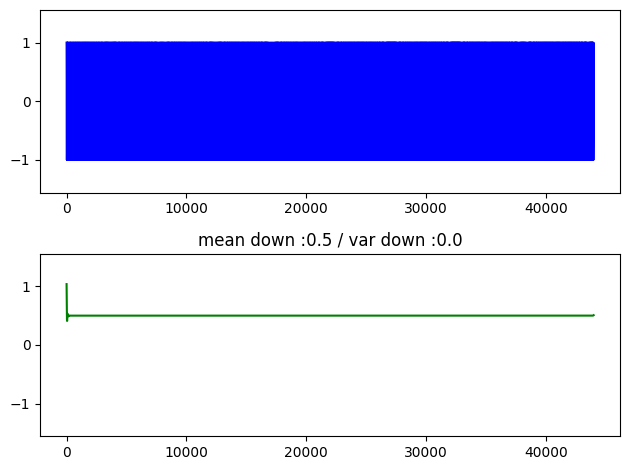

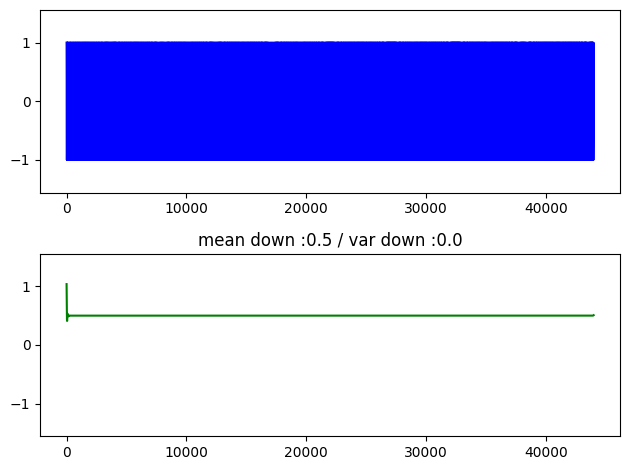

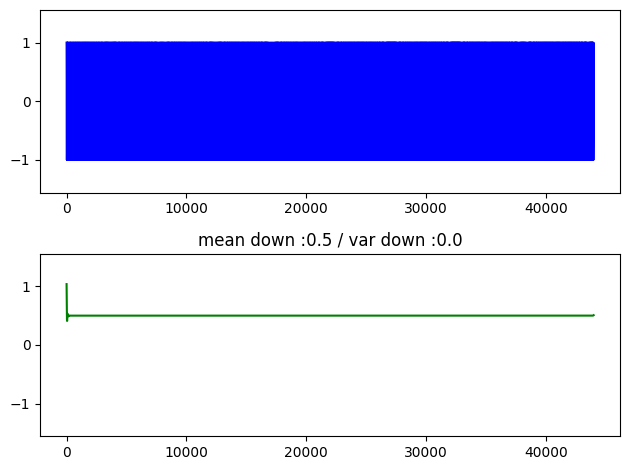

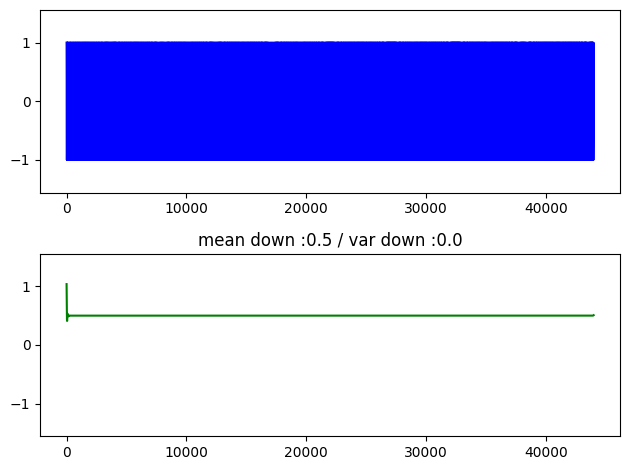

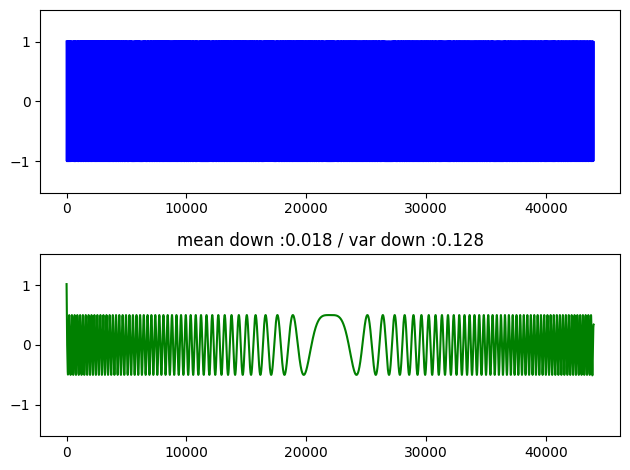

In [66]:
data = [1, 1, 1, 1, 0]
modulated_data = TC.chirp_modulate(data, 44e3, 1e3, 200, 1)

sync = chirp_demodulate_sync(modulated_data, 44e3, 1e3, 200, 1, debug= True)